In [1]:
import cv2

In [5]:
import os 
import keras
import numpy as np 
import tensorflow as tf
from IPython.display import clear_output as cls

In [6]:
# Data Loading 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt

# Pre-Trained Models
from tensorflow.keras.applications import ResNet50V2, InceptionV3, Xception, ResNet152V2

# Model
from keras.models import Sequential, load_model
from keras.layers import GlobalAveragePooling2D as GAP, Dense, Dropout

# Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [7]:
n_classes=4
class_names=['10dt', '20Dt', '50dt', '5dt']

In [8]:
# specify the root path
root_path = '/home/mhsn/Files/PFA/Dataset/Train'
# Get the class names
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)

# Show 
print(f"Total number of classes : {n_classes}")
print(class_names)

FileNotFoundError: [Errno 2] No such file or directory: '/home/mhsn/Files/PFA/Dataset/Train'

In [9]:
# Initialise generator
train_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=10, validation_split=0.1)

# Load data
train_ds = train_gen.flow_from_directory(root_path, class_mode='binary' ,shuffle=True, batch_size=32, subset='training')
valid_ds = train_gen.flow_from_directory(root_path, class_mode='binary' ,shuffle=True, batch_size=32, subset='validation')

FileNotFoundError: [Errno 2] No such file or directory: '/home/mhsn/Files/PFA/Dataset/Train'

# Model



In [7]:
# Model Name


# Pre - Trained Model
base_model = ResNet50V2(include_top=False, input_shape=(256,256,3), weights='imagenet')

# Freeze Weights
base_model.trainable = False

# Model Architecture
model = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu', kernel_initializer='he_normal'),
    Dense(n_classes, activation='softmax')
])

# Callbacks 
#cbs = [EarlyStopping(patience=3, restore_best_weights=True), ModelCheckpoint('/home/mhsn/Downloads/ResNet50V2-Tunisian-Currency.h5', save_best_only=True)]

# Compiling Model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model training
# model.fit(train_ds, validation_data=valid_ds, callbacks=cbs, epochs=50)

# prediction


In [9]:
input_shape=(256,256,3)
model.build(input_shape=(None, *input_shape))
model.load_weights('/home/mhsn/Downloads/ResNet50V2-Tunisian-Currency.h5')

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 8, 8, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,090,372 (91.90 MB)

 Trainable params: 525,572 (2.00 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [11]:
def show_images(GRID=[5,5], model=None, size=(20,20), data=train_ds):
    n_rows = GRID[0]
    n_cols = GRID[1]
    n_images = n_cols * n_rows
    
    i = 1
    plt.figure(figsize=size)
    for images, labels in data:
        id = np.random.randint(len(images))
        image, label = images[id], class_nacames[int(labels[id])]
        
        plt.subplot(n_rows, n_cols, i)
        plt.imshow(image)
        
        if model is None:
            title = f"Class : {label}"
        else:
            pred = class_names[int(np.argmax(model.predict(image[np.newaxis, ...])))]
            title = f"Org : {label}, Pred : {pred}"
        
        plt.title(title)
        plt.axis('off')
        
        i+=1
        if i>=(n_images+1):
            break
        cls()
            
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


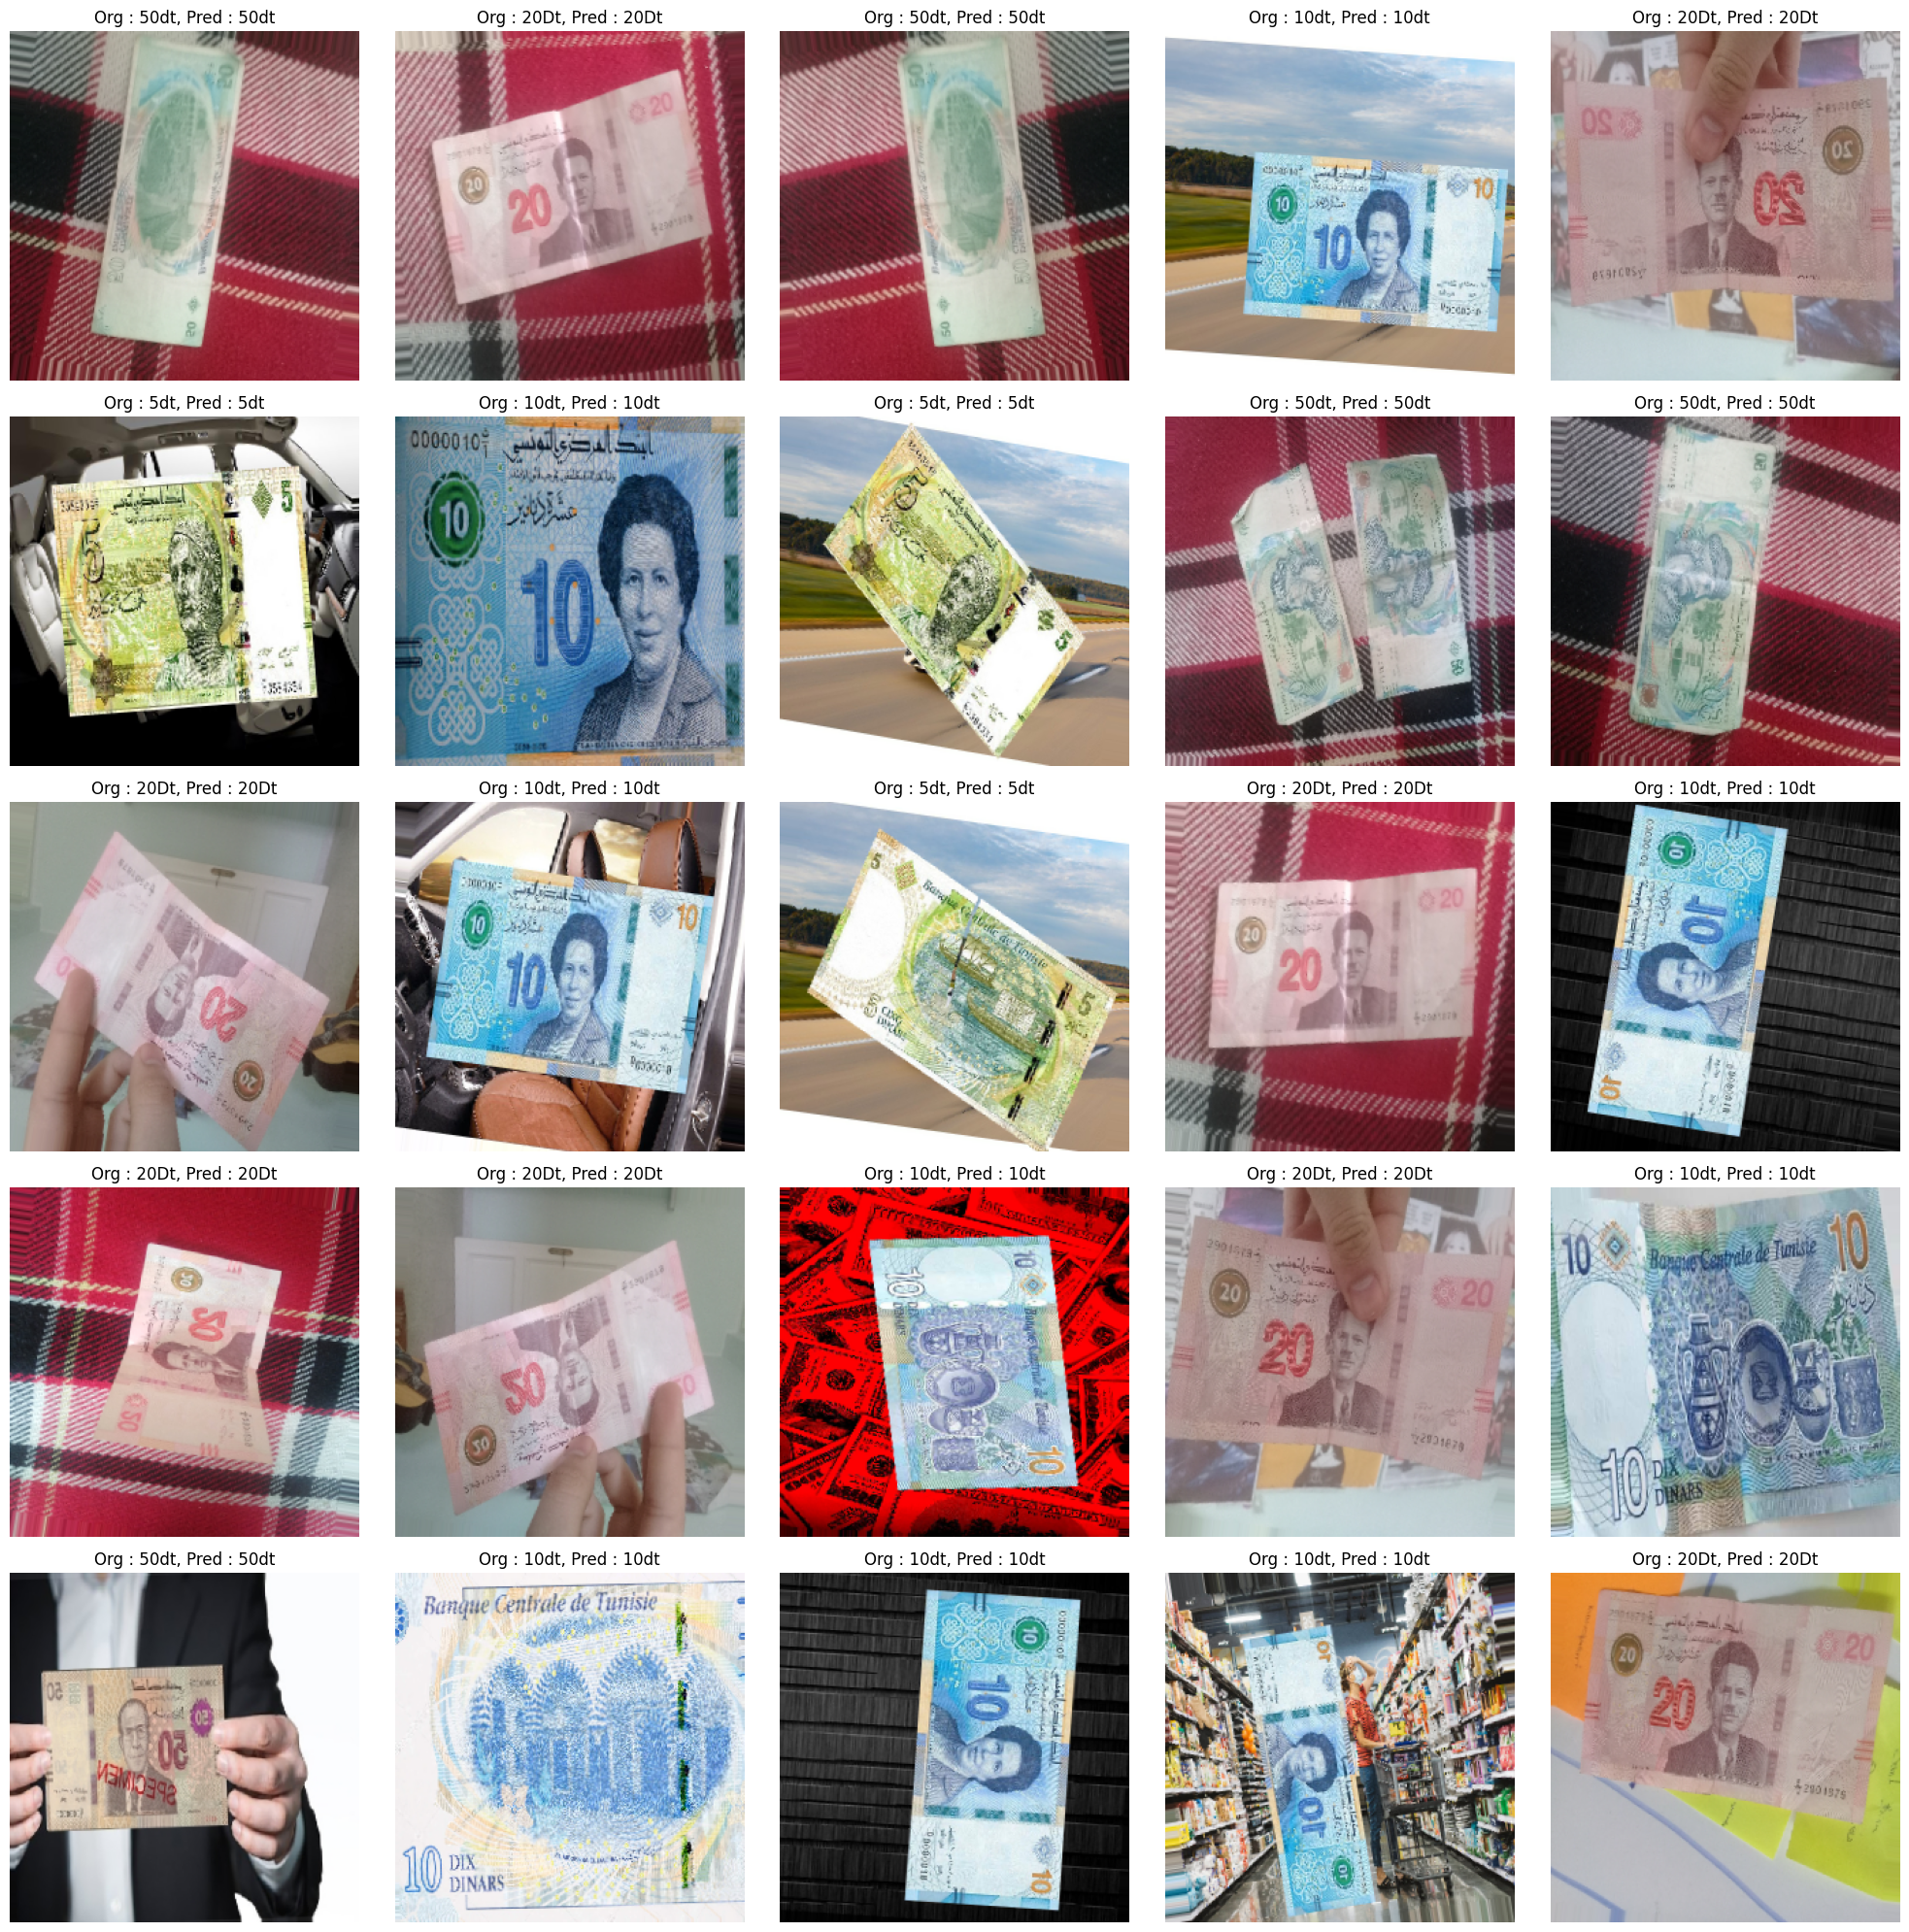

In [12]:
show_images(model=model, data=valid_ds)

In [21]:
def shape (path):
    import numpy as np
    img=cv2.imread(path)
    h,w,c=img.shape
    print(h,w,c)
    

In [69]:
def rescale(path):
    img=cv2.imread(path)
 
    img1=cv2.resize(img,(256,256))
    
    return img1

In [89]:
img=cv2.imread('/home/mhsn/Files/PFA/Dataset/Train/10dt/vdvd.jpg')
h,w,c=cv2.resize(img,(256,256)).shape
print(h,w,c)

256 256 3


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_2_1/Cast:0", shape=(32, 256, 3), dtype=float32). Expected shape (None, 256, 256, 3), but input has incompatible shape (32, 256, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 256, 3), dtype=uint8)
  • training=False
  • mask=None